# Proyecto Semestral Minería de Datos
En el siguiente notebook se cuentra toda la manipulación de datos para el proyecto semestral de minería de datos, el cual consta de la creación de un modelo para predecir si es una canción será popular

### Clustering using scikit-learn (with pandas and matplotlib)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline
pd.set_option('display.max_colwidth', None)
import csv
import numpy as np
from sklearn import cluster
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage  



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ruta = '/content/drive/Shareddrives/Minería de Datos/Manipulación de datos' 

Lectura del dataset y selección de columnas

In [4]:
songs = pd.read_csv('%s/Tiktok.csv'%ruta) 
songs.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,STAY (with Justin Bieber),The Kid LAROI,83,STAY (with Justin Bieber),89,0.591,0.764,-5.484,1,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4,141806
1,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,90,Justice,86,0.677,0.696,-6.181,1,0,0.1190,0.3210,0.000000,0.4200,0.464,90.030,4,198082
2,edamame (feat. Rich Brian),bbno$,72,edamame (feat. Rich Brian),77,0.815,0.848,-4.704,0,4,0.1150,0.0230,0.000162,0.0265,0.684,106.032,4,133707
3,Here's Your Perfect,Jamie Miller,65,Here's Your Perfect,77,0.558,0.454,-5.335,1,6,0.0551,0.4990,0.000000,0.1460,0.424,113.120,4,158594
4,It's You,Sezairi,57,It's You,73,0.630,0.456,-8.285,1,8,0.0317,0.5450,0.000000,0.1140,0.166,137.915,3,251440


In [5]:
#profile = ProfileReport(songs, title='Tiktok Data', explorative=True)
#profile.to_notebook_iframe()

## Elimación de columnas


Se eliminarán las siguientes columnas:

*   track_name: Poca frecuencia en el dataset
*   artist_name: Poca frecuencia en el dataset
*   album: Poca frecuencia en el dataset

In [6]:
songs = songs.drop(['track_name','artist_name','album'], axis=1) # Eliminación de columnas que no se utilizaran
songs.head()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,83,89,0.591,0.764,-5.484,1,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4,141806
1,90,86,0.677,0.696,-6.181,1,0,0.1190,0.3210,0.000000,0.4200,0.464,90.030,4,198082
2,72,77,0.815,0.848,-4.704,0,4,0.1150,0.0230,0.000162,0.0265,0.684,106.032,4,133707
3,65,77,0.558,0.454,-5.335,1,6,0.0551,0.4990,0.000000,0.1460,0.424,113.120,4,158594
4,57,73,0.630,0.456,-8.285,1,8,0.0317,0.5450,0.000000,0.1140,0.166,137.915,3,251440


## Transformaciones de datos

### Transformación tempo
El tempo se agrupará en rangos y se le asignará una

In [7]:
bins = [60 ,76, 108, 120, 140, 168, 200, 209]

labels = [1, 2, 3, 4, 5, 6, 7]
songs['tempo'] = pd.cut(songs['tempo'], bins=bins, labels=labels, right=False)
songs.head()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,83,89,0.591,0.764,-5.484,1,1,0.0483,0.0383,0.000000,0.1030,0.478,6,4,141806
1,90,86,0.677,0.696,-6.181,1,0,0.1190,0.3210,0.000000,0.4200,0.464,2,4,198082
2,72,77,0.815,0.848,-4.704,0,4,0.1150,0.0230,0.000162,0.0265,0.684,2,4,133707
3,65,77,0.558,0.454,-5.335,1,6,0.0551,0.4990,0.000000,0.1460,0.424,3,4,158594
4,57,73,0.630,0.456,-8.285,1,8,0.0317,0.5450,0.000000,0.1140,0.166,4,3,251440


### Transformación popularidad
Se transformará la popularidad en rangos para poder realizar un mejor análisis, se le asignará el nuevo valor según los siguientes rangos:


*   demasiado_popular: 81-100 -> 1
*   muy_popular: 61-80 -> 2
*   popular: 41-60 -> 3
*   poco_popular: 21-40 -> 4
*   impopular: 0-20 -> 5

In [8]:
bins = [0 , 20, 40, 60, 80, 100]

labels = [1, 2, 3, 4, 5]
songs['popularidad'] = pd.cut(songs['track_pop'], bins=bins, labels=labels, right=False)
songs.head()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,popularidad
0,83,89,0.591,0.764,-5.484,1,1,0.0483,0.0383,0.000000,0.1030,0.478,6,4,141806,5
1,90,86,0.677,0.696,-6.181,1,0,0.1190,0.3210,0.000000,0.4200,0.464,2,4,198082,5
2,72,77,0.815,0.848,-4.704,0,4,0.1150,0.0230,0.000162,0.0265,0.684,2,4,133707,4
3,65,77,0.558,0.454,-5.335,1,6,0.0551,0.4990,0.000000,0.1460,0.424,3,4,158594,4
4,57,73,0.630,0.456,-8.285,1,8,0.0317,0.5450,0.000000,0.1140,0.166,4,3,251440,4


In [9]:
profile = ProfileReport(songs)
#profile.to_file('/content/drive/Shareddrives/Minería de Datos/Tareas/Tarea 3/songs_now.html')

In [10]:
#profile

## Cluster

### Determinación de número de clusters

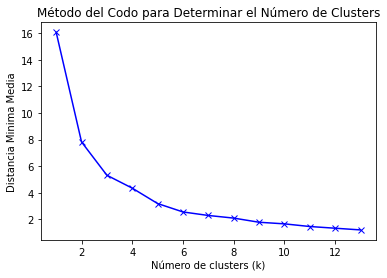

In [11]:
distortions = []
K = range(1,14)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(songs[['track_pop', 'danceability']])
    distortions.append(sum(np.min(cdist(songs[['track_pop', 'danceability']], kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / songs[['track_pop', 'danceability']].shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distancia Minima Media')
plt.title('Método del Codo para Determinar el Número de Clusters')
plt.show()

6 cluster

### Popularidad y bailabilidad

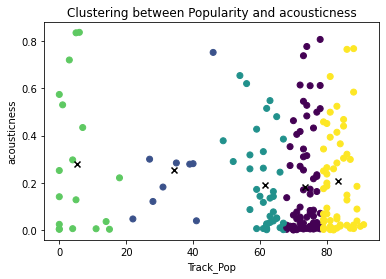

In [12]:
# K-means clustering basado en popularidad y bailabilidad.
kmeans = cluster.KMeans(5)
kmeans.fit(songs[['track_pop', 'acousticness']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(songs['track_pop'], songs['acousticness'], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.ylabel('acousticness')
plt.xlabel('Track_Pop')
plt.title('Clustering between Popularity and acousticness')
plt.show()

### Energía

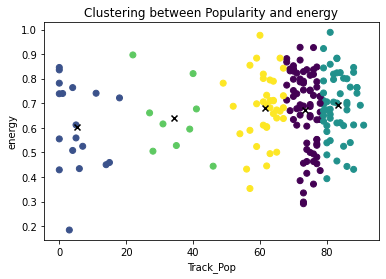

In [13]:
# K-means clustering basado en popularidad y energía.
kmeans = cluster.KMeans(5)
kmeans.fit(songs[['track_pop', 'energy']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(songs['track_pop'], songs['energy'], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.ylabel('energy')
plt.xlabel('Track_Pop')
plt.title('Clustering between Popularity and energy')
plt.show()

### Modo

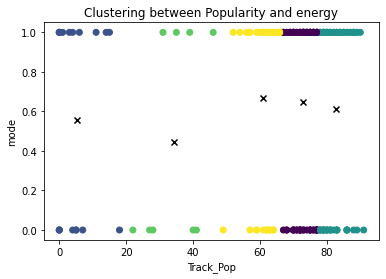

In [14]:
# K-means clustering basado en popularidad y bailabilidad.
kmeans = cluster.KMeans(5)
kmeans.fit(songs[['track_pop', 'mode']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(songs['track_pop'], songs['mode'], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.ylabel('mode')
plt.xlabel('Track_Pop')
plt.title('Clustering between Popularity and energy')
plt.show()

No hay similitud

### Instrumental

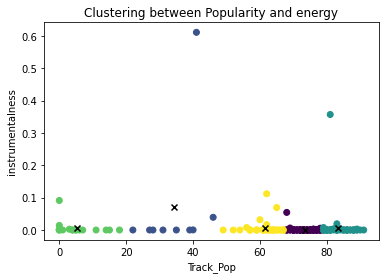

In [15]:
# K-means clustering basado en popularidad y instrumental.
kmeans = cluster.KMeans(5)
kmeans.fit(songs[['track_pop', 'instrumentalness']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(songs['track_pop'], songs['instrumentalness'], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.ylabel('instrumentalness')
plt.xlabel('Track_Pop')
plt.title('Clustering between Popularity and energy')
plt.show()

Poco variable

Instrumentalness no se tomará en cuenta para la medición, por la poca variación

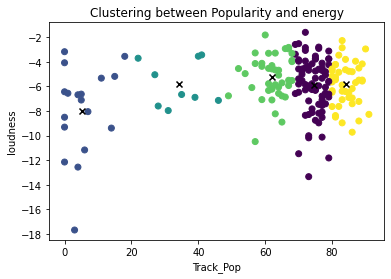

In [16]:
# K-means clustering basado en popularidad y bailabilidad.
kmeans = cluster.KMeans(5)
kmeans.fit(songs[['track_pop', 'loudness']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(songs['track_pop'], songs['loudness'], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.ylabel('loudness')
plt.xlabel('Track_Pop')
plt.title('Clustering between Popularity and energy')
plt.show()

### liveness

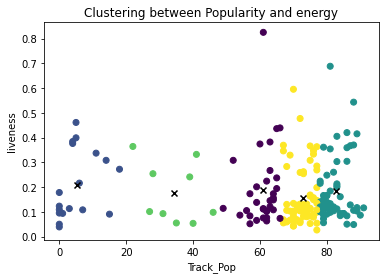

In [17]:
# K-means clustering basado en popularidad y bailabilidad.
kmeans = cluster.KMeans(5)
kmeans.fit(songs[['track_pop', 'liveness']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(songs['track_pop'], songs['liveness'], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.ylabel('liveness')
plt.xlabel('Track_Pop')
plt.title('Clustering between Popularity and energy')
plt.show()

### valence

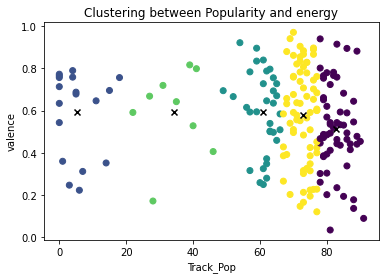

In [18]:
# K-means clustering basado en popularidad y balance.
kmeans = cluster.KMeans(5)
kmeans.fit(songs[['track_pop', 'valence']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(songs['track_pop'], songs['valence'], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.ylabel('valence')
plt.xlabel('Track_Pop')
plt.title('Clustering between Popularity and energy')
plt.show()

[[82.71186441]
 [ 5.16666667]
 [60.84848485]
 [34.33333333]
 [72.81690141]]


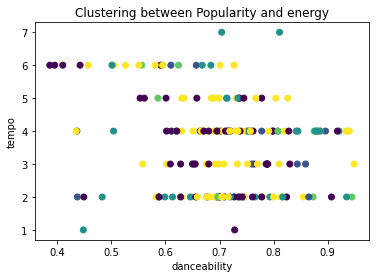

In [19]:
# K-means clustering basado en popularidad y balance.
kmeans = cluster.KMeans(5)
kmeans.fit(songs[['track_pop']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(songs['danceability'], songs['tempo'], c=labels)
#plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.ylabel('tempo')
plt.xlabel('danceability')
plt.title('Clustering between Popularity and energy')
print(centroids)

# Modelo


In [38]:
#Se importan librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Digraph
from sklearn.ensemble import RandomForestClassifier


In [21]:
df_train, df_test = train_test_split(songs, test_size = 0.2)
print(len(df_train), len(df_test), len(songs))
df_train.head()

152 38 190


,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,popularidad
127,79,80,0.720,0.706,-4.719,1,1,0.0473,0.0684,0.0,0.166,0.620,4,4,187436,5
53,65,67,0.690,0.843,-2.949,1,1,0.0534,0.0167,0.0,0.346,0.428,4,4,220178,4
95,61,73,0.691,0.829,-7.179,1,0,0.0412,0.0289,0.0,0.254,0.866,2,4,169154,4
178,90,72,0.581,0.681,-4.469,1,7,0.0435,0.0472,0.0,0.104,0.634,6,4,256800,4
77,63,75,0.706,0.751,-6.323,1,9,0.0708,0.1730,0.0,0.168,0.195,2,4,182307,4


In [34]:
X = songs[['danceability', 'energy', 'loudness', 'key', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'time_signature','duration_ms']]
Y = songs[['popularidad']]

In [35]:
# Separando los datos en sets de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, 
                        Y, test_size = 0.2)

# Armando un simple arbol de decisión
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print('Precisión modelo inicial train/test  {0:.3f}/{1:.3f}'
      .format(tree.score(X_train, y_train), tree.score(X_test, y_test)))

Precisión modelo inicial train/test  0.625/0.500


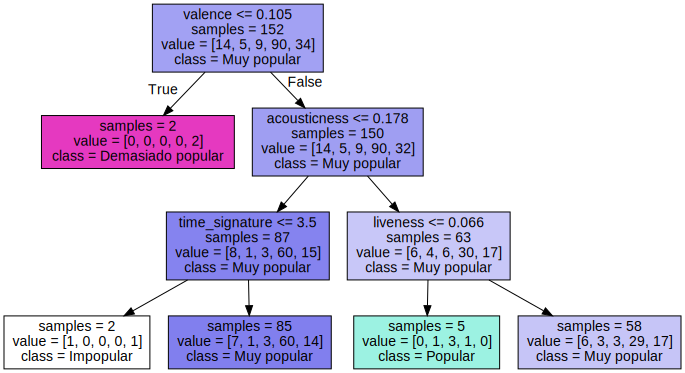

In [36]:
import graphviz
# Dibujando el modelo
export_graphviz(tree, out_file="tree.dot", class_names=["Impopular", "Poco Popular", "Popular", "Muy popular", "Demasiado popular"], 
                feature_names=X.columns, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [39]:
rf = RandomForestClassifier() # Creando el modelo
rf.fit(X_train, y_train) # Ajustando el modelo
rf.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.5263157894736842

In [40]:
from sklearn.ensemble import AdaBoostClassifier
# Utilizando AdaBoost para aumentar la precisión
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, 
                         learning_rate=1.5, random_state=1)
# Ajustando los datos
ada = ada.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
ada.score(X_test,y_test)

0.5263157894736842

In [42]:
ada.score(X_train,y_train)

0.9736842105263158

In [43]:
ada.feature_importances_

array([0.20556717, 0.12062771, 0.07177512, 0.07634126, 0.08504766,
       0.08656261, 0.09068561, 0.08505711, 0.04998364, 0.02731474,
       0.10103738])

In [47]:
imp = pd.DataFrame(zip(X.columns, ada.feature_importances_), columns = ['Caracteristica', 'importancia'])
imp = imp.sort_values(by = 'importancia', ascending = False)
imp

,Caracteristica,importancia
0,danceability,0.205567
1,energy,0.120628
10,duration_ms,0.101037
6,liveness,0.090686
5,acousticness,0.086563
7,valence,0.085057
4,speechiness,0.085048
3,key,0.076341
2,loudness,0.071775
8,tempo,0.049984
